In [121]:
import tensorflow as tf

In [122]:
train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    "../Data/DataLaba5/caltech-101/caltech-101/101_ObjectCategories.tar/101_ObjectCategories/",  # путь к изображениям
    validation_split=0.25,  # процент на тест
    subset="both",  # берем и обучающую и тестовую выборку
    seed=42,  # сид генератора случайных чисел
    labels='inferred',
    color_mode='rgb',
    shuffle=True,
    # целевой размер изображения (СНАЧАЛА ВЫСОТА, ПОТОМ ШИРИНА)
    image_size=(224, 224),
    batch_size=10,  # размер пакета (батча)
)


Found 889 files belonging to 3 classes.
Using 667 files for training.
Using 222 files for validation.


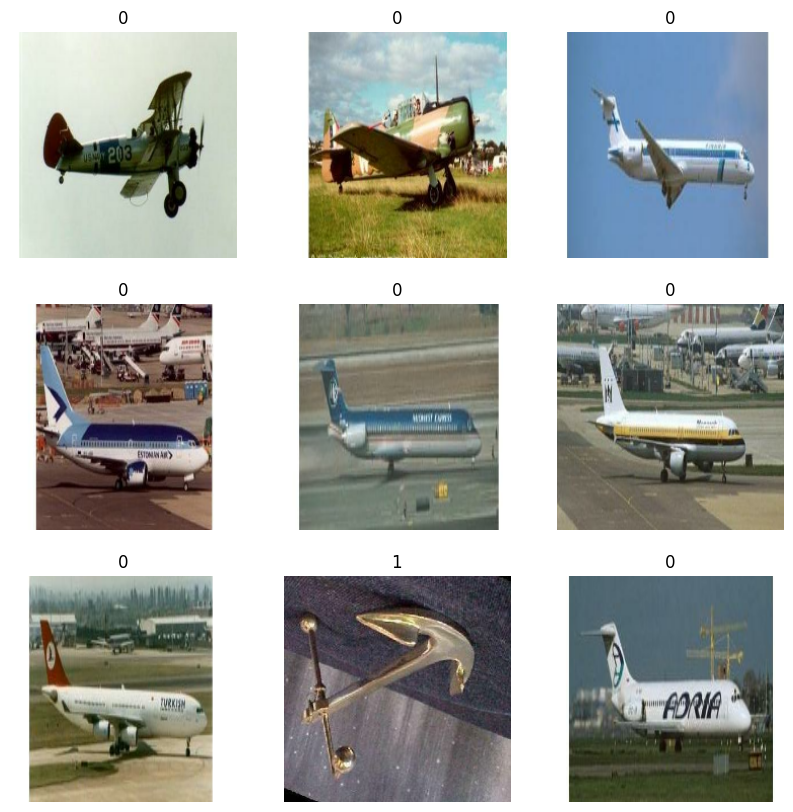

In [123]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
# берем один батч
for images, labels in train_ds.take(1):
    # отрисуем 9 картинок из батча
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        # выводим картинку
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        # выключаем оси (чтобы они не отображались)
        plt.axis("off")


In [124]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomContrast(factor=0.8)
    ]
)


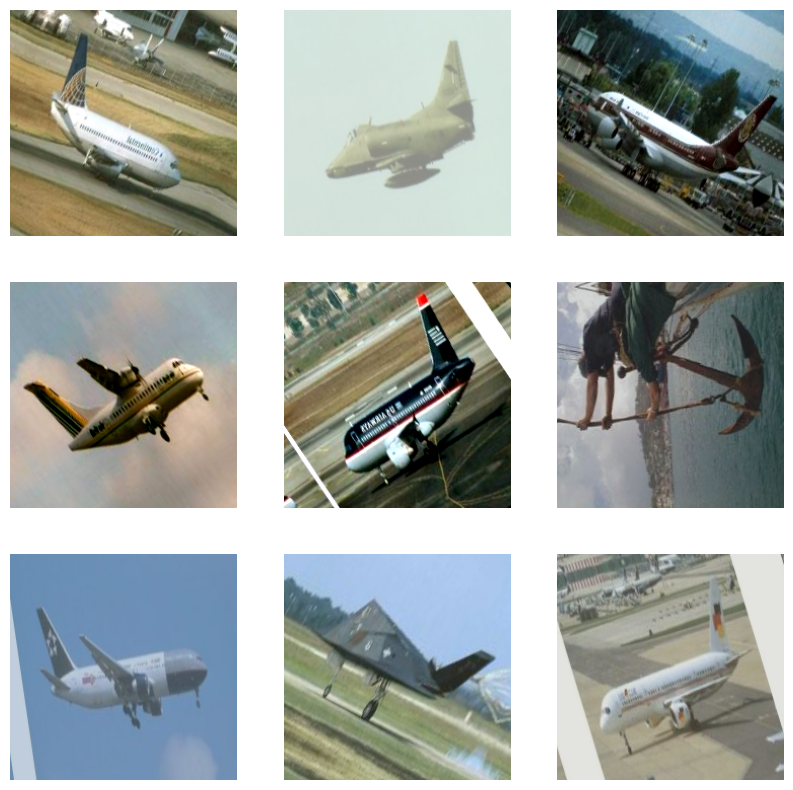

In [125]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.axis("off")


In [126]:
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label)
)


## Enother

In [127]:
vgg = tf.keras.applications.VGG19(weights='imagenet', include_top=True)
vgg.summary()


Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [128]:
inp = vgg.input
new_classification_layer = tf.keras.layers.Dense(3, activation='softmax')
out = new_classification_layer(vgg.layers[-2].output)
model_new = tf.keras.Model(inp, out)
model_new.summary()
for layer in model_new.layers:
    layer.trainable = False
model_new.layers[-1].trainable = True
model_new.layers[-10].trainable = True


Model: "model_16"
_________________________________________________________________


 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_co

In [129]:
model_new.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam', metrics=['accuracy',])
model_new.summary()


Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [130]:
p = model_new.fit(train_ds, epochs=5, validation_data=test_ds)


Epoch 1/5
67/67 [==============================] - 77s 1s/step - loss: 0.2078 - accuracy: 0.9490 - val_loss: 0.0424 - val_accuracy: 0.9820
Epoch 2/5
67/67 [==============================] - 73s 1s/step - loss: 0.0317 - accuracy: 0.9895 - val_loss: 0.0566 - val_accuracy: 0.9820
Epoch 3/5
67/67 [==============================] - 73s 1s/step - loss: 0.0130 - accuracy: 0.9955 - val_loss: 0.0252 - val_accuracy: 0.9865
Epoch 4/5
67/67 [==============================] - 73s 1s/step - loss: 0.0131 - accuracy: 0.9955 - val_loss: 0.0162 - val_accuracy: 0.9910
Epoch 5/5
67/67 [==============================] - 71s 1s/step - loss: 0.0170 - accuracy: 0.9940 - val_loss: 0.0533 - val_accuracy: 0.9865


In [131]:
p.history


{'loss': [0.2078099548816681,
  0.03165602684020996,
  0.013046542182564735,
  0.013085328042507172,
  0.017016049474477768],
 'accuracy': [0.9490255117416382,
  0.9895052313804626,
  0.995502233505249,
  0.995502233505249,
  0.9940029978752136],
 'val_loss': [0.042435918003320694,
  0.05658065900206566,
  0.025220943614840508,
  0.016248518601059914,
  0.053305577486753464],
 'val_accuracy': [0.9819819927215576,
  0.9819819927215576,
  0.9864864945411682,
  0.9909909963607788,
  0.9864864945411682]}

# enother

In [132]:
train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    "../Data/DataLaba5/caltech-101/caltech-101/101_ObjectCategories.tar/101_ObjectCategories/",  # путь к изображениям
    validation_split=0.25,  # процент на тест
    subset="both",  # берем и обучающую и тестовую выборку
    seed=42,  # сид генератора случайных чисел
    labels='inferred',
    color_mode='rgb',
    shuffle=True,
    # целевой размер изображения (СНАЧАЛА ВЫСОТА, ПОТОМ ШИРИНА)
    image_size=(299, 299),
    batch_size=10,  # размер пакета (батча)
)


Found 889 files belonging to 3 classes.
Using 667 files for training.
Using 222 files for validation.


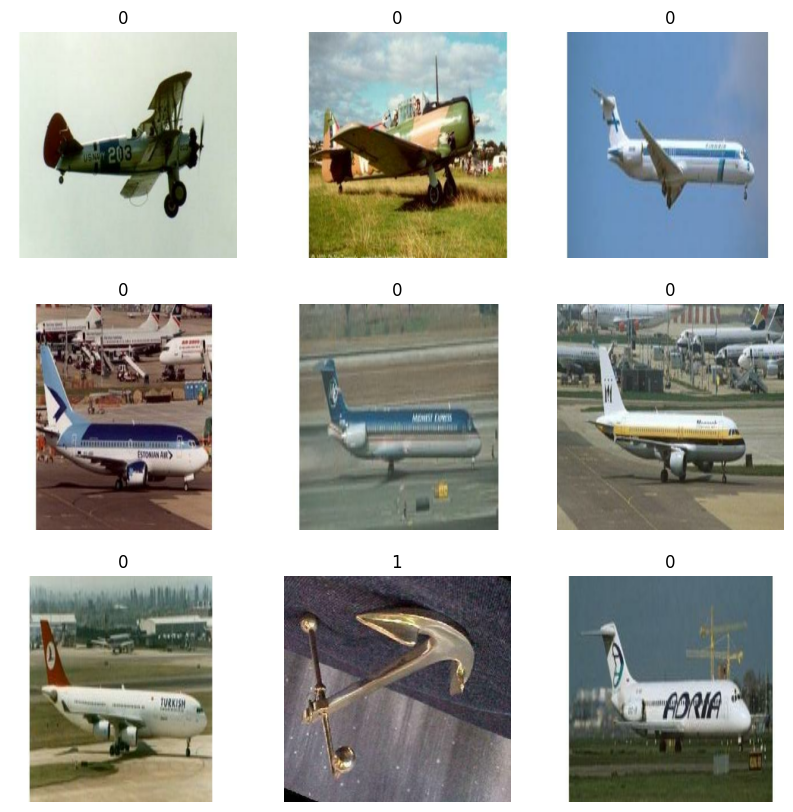

In [133]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
# берем один батч
for images, labels in train_ds.take(1):
    # отрисуем 9 картинок из батча
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        # выводим картинку
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        # выключаем оси (чтобы они не отображались)
        plt.axis("off")


In [134]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomContrast(factor=0.8)
    ]
)


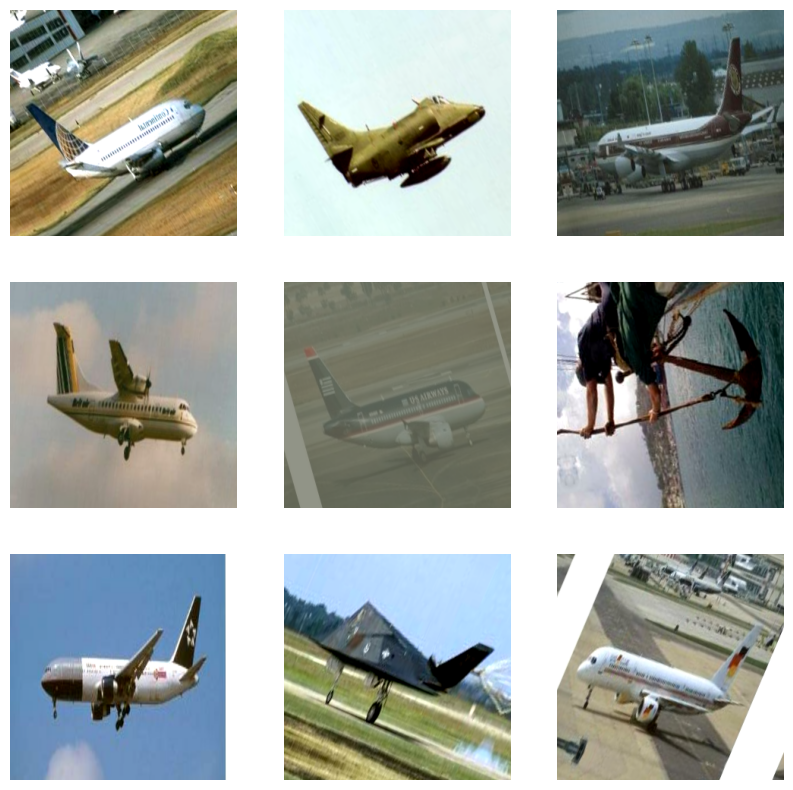

In [135]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.axis("off")


In [136]:
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label)
)


In [137]:
# inc = tf.keras.applications.inception_v3.InceptionV3(weights=None, include_top=False, input_shape=(224, 224, 3), classes=3,classifier_activation='softmax')
inc = tf.keras.applications.inception_v3.InceptionV3(weights='imagenet', include_top=True)
inc.summary()


Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_942 (Conv2D)            (None, 149, 149, 32  864         ['input_16[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_940 (Batch  (None, 149, 149, 32  96         ['conv2d_942[0][0]']             
 Normalization)                 )                                                      

In [138]:
inc.input


<KerasTensor: shape=(None, 299, 299, 3) dtype=float32 (created by layer 'input_16')>

In [139]:
train_ds.element_spec[0]


TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None)

In [140]:
inc.layers[-1].output


<KerasTensor: shape=(None, 1000) dtype=float32 (created by layer 'predictions')>

In [151]:
inp = inc.input
new_classification_layer = tf.keras.layers.Dense(3, activation='softmax')
out = new_classification_layer(inc.layers[-2].output)
model_new = tf.keras.Model(inp, out)
model_new.summary()
for layer in model_new.layers:
    model_new.trainable = False
model_new.layers[-1].trainable = True
model_new.layers[-2].trainable = True


Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_942 (Conv2D)            (None, 149, 149, 32  864         ['input_16[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_940 (Batch  (None, 149, 149, 32  96         ['conv2d_942[0][0]']             
 Normalization)                 )                                                          

In [152]:
model_new.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam', metrics=['accuracy'])
model_new.summary()


Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_942 (Conv2D)            (None, 149, 149, 32  864         ['input_16[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_940 (Batch  (None, 149, 149, 32  96         ['conv2d_942[0][0]']             
 Normalization)                 )                                                          

 activation_942 (Activation)    (None, 147, 147, 64  0           ['batch_normalization_942[0][0]']
                                )                                                                 
                                                                                                  
 max_pooling2d_42 (MaxPooling2D  (None, 73, 73, 64)  0           ['activation_942[0][0]']         
 )                                                                                                
                                                                                                  
 conv2d_945 (Conv2D)            (None, 73, 73, 80)   5120        ['max_pooling2d_42[0][0]']       
                                                                                                  
 batch_normalization_943 (Batch  (None, 73, 73, 80)  240         ['conv2d_945[0][0]']             
 Normalization)                                                                                   
          

In [153]:
p2 = model_new.fit(train_ds, epochs=5, validation_data=test_ds)


Epoch 1/5
67/67 [==============================] - 47s 629ms/step - loss: 4.3059 - accuracy: 0.8966 - val_loss: 3.9976 - val_accuracy: 0.9099
Epoch 2/5
67/67 [==============================] - 41s 611ms/step - loss: 4.1819 - accuracy: 0.8966 - val_loss: 3.9976 - val_accuracy: 0.9099
Epoch 3/5
67/67 [==============================] - 41s 612ms/step - loss: 4.5624 - accuracy: 0.8951 - val_loss: 3.9976 - val_accuracy: 0.9099
Epoch 4/5
67/67 [==============================] - 41s 614ms/step - loss: 4.4974 - accuracy: 0.8966 - val_loss: 3.9976 - val_accuracy: 0.9099
Epoch 5/5
67/67 [==============================] - 41s 614ms/step - loss: 4.2082 - accuracy: 0.8966 - val_loss: 3.9976 - val_accuracy: 0.9099


In [154]:
p = {'loss': [0.2078099548816681,
              0.03165602684020996,
              0.013046542182564735,
              0.013085328042507172,
              0.017016049474477768],
     'accuracy': [0.9490255117416382,
                  0.9895052313804626,
                  0.995502233505249,
                  0.995502233505249,
                  0.9940029978752136],
     'val_loss': [0.042435918003320694,
                  0.05658065900206566,
                  0.025220943614840508,
                  0.016248518601059914,
                  0.053305577486753464],
     'val_accuracy': [0.9819819927215576,
                      0.9819819927215576,
                      0.9864864945411682,
                      0.9909909963607788,
                      0.9864864945411682]}


In [155]:
p2.history

{'loss': [4.305918216705322,
  4.18194055557251,
  4.562445163726807,
  4.497417449951172,
  4.208167552947998],
 'accuracy': [0.8965517282485962,
  0.8965517282485962,
  0.8950524926185608,
  0.8965517282485962,
  0.8965517282485962],
 'val_loss': [3.997567892074585,
  3.997567892074585,
  3.997567892074585,
  3.997567892074585,
  3.997567892074585],
 'val_accuracy': [0.9099099040031433,
  0.9099099040031433,
  0.9099099040031433,
  0.9099099040031433,
  0.9099099040031433]}

In [156]:
for i, j in zip(p['accuracy'], p2.history['accuracy']):
    print(i - j)

0.05247378349304199
0.09295350313186646
0.10044974088668823
0.09895050525665283
0.09745126962661743
